# Sample composition

In [1]:
# import numpy as np
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
inputFile = 'data/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_1.z'

# First check how many particles we have in the file

In [3]:
import h5py
h5File = h5py.File(inputFile, 'r')
treeArray = h5File['t_allpar_new'][()]
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_index']
labels_df = pd.DataFrame(treeArray, columns = labels)
labels_df

,j_q,j_g,j_w,j_z,j_t,j_index
0,0,0,1,0,0,200189766
1,0,0,1,0,0,200189766
2,0,0,1,0,0,200189766
3,0,0,1,0,0,200189766
4,0,0,1,0,0,200189766
...,...,...,...,...,...,...
5130668,0,1,0,0,0,197603
5130669,0,1,0,0,0,197603
5130670,0,1,0,0,0,197603
5130671,0,1,0,0,0,197603


# Next Step: Drop the dublicate particles

In [4]:
labels_df[labels_df['j_index']==j_index].drop_duplicates()
labels_df[labels_df['j_index'].duplicated() == False]

NameError: name 'j_index' is not defined

# Next Step:Get rid of the j_index table

In [6]:
labels_vals = labels_df[labels_df['j_index'].duplicated() == False].drop('j_index',axis=1)
labels_vals

,j_q,j_g,j_w,j_z,j_t
0,0,0,1,0,0
62,0,1,0,0,0
117,0,0,1,0,0
147,0,0,0,1,0
178,0,1,0,0,0
...,...,...,...,...,...
5130336,0,1,0,0,0
5130424,0,0,1,0,0
5130480,0,0,1,0,0
5130525,0,0,0,1,0


# Draw the composition table

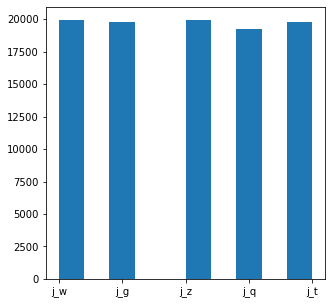

In [7]:
dat = []
for row in labels_vals.iterrows():
    for j in range(row[1].shape[0]):
        if row[1][j]==1:
            dat.append(labels[j])
plt.figure(figsize=(5,5))
plt.hist(dat)
plt.show()
plt.close()

# Using other file to analyse

In [45]:
inputFile = '../processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z'

In [46]:
import h5py
h5File = h5py.File(inputFile, 'r')
treeArray = h5File['t_allpar_new'][()]
labels = ['j_q', 'j_g', 'j_w', 'j_z', 'j_t', 'j_index']
labels_df = pd.DataFrame(treeArray, columns = labels)
labels_df

,j_q,j_g,j_w,j_z,j_t,j_index
0,0,0,0,1,0,300003264.0
1,0,0,0,0,1,400010240.0
2,0,0,1,0,0,200017616.0
3,0,1,0,0,0,12607.0
4,0,0,0,0,1,400011040.0
...,...,...,...,...,...,...
5119904,0,1,0,0,0,6717.0
5119905,0,0,1,0,0,200000848.0
5119906,0,0,0,1,0,300014656.0
5119907,0,1,0,0,0,9068.0


In [47]:

labels_df[labels_df['j_index']==j_index].drop_duplicates()
labels_df[labels_df['j_index'].duplicated() == False]


,j_q,j_g,j_w,j_z,j_t,j_index
0,0,0,0,1,0,300003264.0
1,0,0,0,0,1,400010240.0
2,0,0,1,0,0,200017616.0
3,0,1,0,0,0,12607.0
4,0,0,0,0,1,400011040.0
...,...,...,...,...,...,...
950174,0,1,0,0,0,767.0
951458,0,1,0,0,0,719.0
1070593,0,1,0,0,0,7941.0
1082104,0,1,0,0,0,10504.0


In [48]:
labels_vals = labels_df[labels_df['j_index'].duplicated() == False].drop('j_index',axis=1)
labels_vals


,j_q,j_g,j_w,j_z,j_t
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
950174,0,1,0,0,0
951458,0,1,0,0,0
1070593,0,1,0,0,0
1082104,0,1,0,0,0


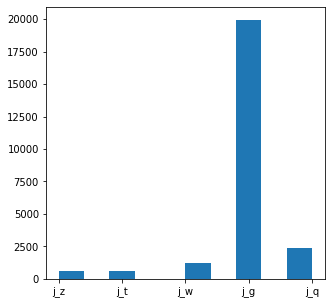

In [53]:
dat1 = []
for row in labels_vals.iterrows():
    for j in range(row[1].shape[0]):
        if row[1][j]==1:
            dat1.append(labels[j])
plt.figure(figsize=(5,5))
plt.hist(dat1)
plt.show()
plt.close()

(array([  621.,     0.,   625.,     0.,     0.,  1239.,     0., 19932.,
            0.,  2399.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

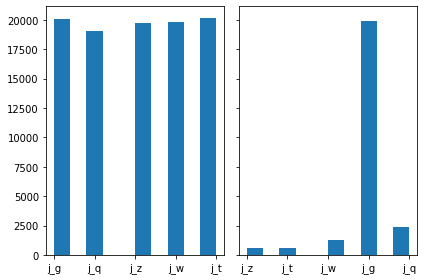

In [58]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(dat)
axs[1].hist(dat1)